# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/dharun4772/doordash-eta-prediction

Import the necessary libraries and create your dataframe(s).

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a new dataframe by reading the csv
df = pd.read_csv("DoorDash.csv")

# See if the df was imported and see column info
display(df.columns)
df.head()

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [80]:
# Count the columns total null values - sort amounts by greatest to least

df.isnull().sum().sort_values(ascending = False)

total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
store_primary_category                           4760
order_protocol                                    995
market_id                                         987
estimated_store_to_consumer_driving_duration      526
actual_delivery_time                                7
created_at                                          0
store_id                                            0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
estimated_order_place_duration                      0
dtype: int64

In [81]:
# Lots of nulls to address regarding specific doordash driver information not part
# of my scope, so I will drop the columns

df.drop(['total_onshift_dashers', 'total_busy_dashers','total_outstanding_orders','estimated_store_to_consumer_driving_duration'], axis = 1, inplace = True) 

df.columns


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'estimated_order_place_duration'],
      dtype='object')

In [82]:
# Check percentage of remaining nulls to df total
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

market_id - 0%
created_at - 0%
actual_delivery_time - 0%
store_id - 0%
store_primary_category - 2%
order_protocol - 1%
total_items - 0%
subtotal - 0%
num_distinct_items - 0%
min_item_price - 0%
max_item_price - 0%
estimated_order_place_duration - 0%


In [83]:
# Replace null values in the market_id column to market 0
df['market_id'].fillna('0', inplace = True)

In [84]:
# Replace null values in the store_primary_category column to unknown
df['store_primary_category'].fillna('Unknown', inplace = True)

In [85]:
# Look closer at the null values in the actual_delivery_time
null_rows = df.loc[df['actual_delivery_time'].isnull()]

print(null_rows.to_string())

       market_id           created_at actual_delivery_time  store_id store_primary_category  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  max_item_price  estimated_order_place_duration
109          3.0  2015-02-10 21:51:54                  NaN      1698               sandwich             3.0            1      1125                   1             975             975                             251
7670         2.0  2015-02-08 02:54:42                  NaN      2340               japanese             2.0            4      2860                   3             390             690                             251
78511        4.0  2015-02-15 02:15:45                  NaN       901               catering             1.0            9      5050                   6             375            1125                             446
115982       4.0  2015-02-16 01:52:49                  NaN      1107                  pizza             3.0            2      2094          

In [86]:
# Replace null values in the actual_deliver_time to a non null timestamp
df['actual_delivery_time'].fillna('2015-02-01 00:00:00 ', inplace = True)

In [87]:
df.isnull().sum().sort_values(ascending = False)

order_protocol                    995
market_id                           0
created_at                          0
actual_delivery_time                0
store_id                            0
store_primary_category              0
total_items                         0
subtotal                            0
num_distinct_items                  0
min_item_price                      0
max_item_price                      0
estimated_order_place_duration      0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [88]:
# If a column is numeric to check for outliers

# find the datatype of each column
df.dtypes

market_id                          object
created_at                         object
actual_delivery_time               object
store_id                            int64
store_primary_category             object
order_protocol                    float64
total_items                         int64
subtotal                            int64
num_distinct_items                  int64
min_item_price                      int64
max_item_price                      int64
estimated_order_place_duration      int64
dtype: object

In [89]:
df['subtotal'].describe()

count    197428.000000
mean       2682.331402
std        1823.093688
min           0.000000
25%        1400.000000
50%        2200.000000
75%        3395.000000
max       27100.000000
Name: subtotal, dtype: float64

In [90]:
# Define and Find subtotal outliers
outlier = np.where((df['subtotal'] < 0.0) & (df['subtotal'] > 3395.0))

<AxesSubplot:ylabel='Frequency'>

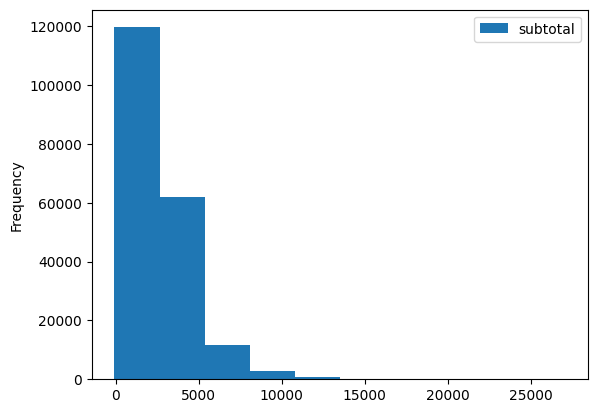

In [91]:
# Visualize subtotal outliers using a histogram
df.plot.hist(column="subtotal")

<AxesSubplot:xlabel='store_id', ylabel='subtotal'>

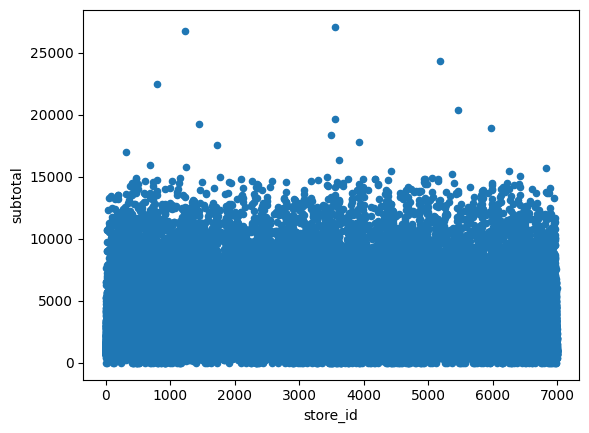

In [92]:
# Visualize subtotal outliers using a scatterplot
df.plot.scatter(x="store_id",y="subtotal")

In [100]:
df.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,estimated_order_place_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,4,3441,4,557,1239,446
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,1,1900,1,1400,1400,446
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,Unknown,1,1900,1,1900,1900,446
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,Unknown,6,6900,5,600,1800,446
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,Unknown,3,3900,3,1100,1600,446


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [93]:
# Find distinct unique rows

columns = [['store_id', 'total_items',
       'subtotal', 'num_distinct_items','min_item_price','max_item_price','estimated_order_place_duration']]
for names in columns:
    print(df[names].nunique())

store_id                          6743
total_items                         57
subtotal                          8368
num_distinct_items                  20
min_item_price                    2312
max_item_price                    2652
estimated_order_place_duration      98
dtype: int64


In [94]:
# Remove unnecessary columns from dataframe
# Not relevant to my anaylsis estimated_order_place_duration
df.drop(['order_protocol'], axis=1, inplace = True)

In [95]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'estimated_order_place_duration'],
      dtype='object')

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [102]:
# Tail check
df.tail()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,estimated_order_place_duration
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,3,1389,3,345,649,251
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,6,3010,4,405,825,251
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,5,1836,3,300,399,251
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1,1175,1,535,535,446
197427,1.0,2015-02-08 19:24:33,2015-02-08 20:01:41,3630,sandwich,4,2605,4,425,750,446


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? 
I found three of the four types of dirty data, there was not inconsistent.
2. Did the process of cleaning your data give you new insights into your dataset?
Yes, I learned that there where a lot of null values that I didn't expect. I didn't want those to interfere with a proper analysis. Also, there where a lot of columns with data that were not relevant to the business questions.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
I want to extract more detailed date information from the created_at column and drill down to find out more information about what time orders are more often placed, which days are the most popular day of the week for orders and how long a typical order takes from created_at to actual_delivery_time